## Library Setup

### Transformations
 - <mark>__Scale Down Ordinal Data By Substracting all samples with Global Feature Minimum__</mark>
 - <mark>__Sort Columns by Name for better visibility__</mark>
 - <mark>__Ordinally Encode Nominal Data to reduce categorical distance within a feature__</mark>
 - <mark>__Add a Column - Sum of all Binary Features along x-axis__</mark>
 - <mark>__Standardise the Ratio Features using MinMaxScaler__</mark>
 - <mark>__Group By binary Literal__</mark>
 - <mark>__Generated A Normal Rank for all Ordinal Features__</mark>
 - <mark>__Generated Dummy Variable for categoricals__</mark>
 - <mark>__Made all Type Conversions__</mark>


In [1]:
# import widen_notebook
from mysetup import NotebookFinder
import sys
sys.meta_path.append(NotebookFinder())

from setup_transform import *

importing Jupyter notebook from setup_transform.ipynb


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


(3796, 45)
(1628, 44)


In [4]:
old_ordinal

,ordinal__v_15,ordinal__v_31,ordinal__v_13,ordinal__v_33,ordinal__v_17,ordinal__v_19,ordinal__v_29,ordinal__v_23,ordinal__v_24,ordinal__v_10,ordinal__v_5,ordinal__v_6,ordinal__v_22,ordinal__v_0
id,,,,,,,,,,,,,,
0,11,26,14,29,48,24,22,3,15,25,37,14,28,12
1,12,27,23,30,55,27,18,4,19,26,46,13,27,13
2,10,31,14,29,48,24,19,3,15,25,37,12,25,12
3,13,26,14,30,48,25,19,3,15,27,40,15,25,12
4,18,49,33,41,61,41,29,7,28,32,50,27,30,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,13,27,14,29,48,23,18,3,15,25,43,10,25,12
3792,20,30,22,34,55,27,24,3,15,35,44,24,30,15
3793,14,30,17,32,57,25,25,8,24,33,49,11,32,20


## Base Non Parametric Estimate

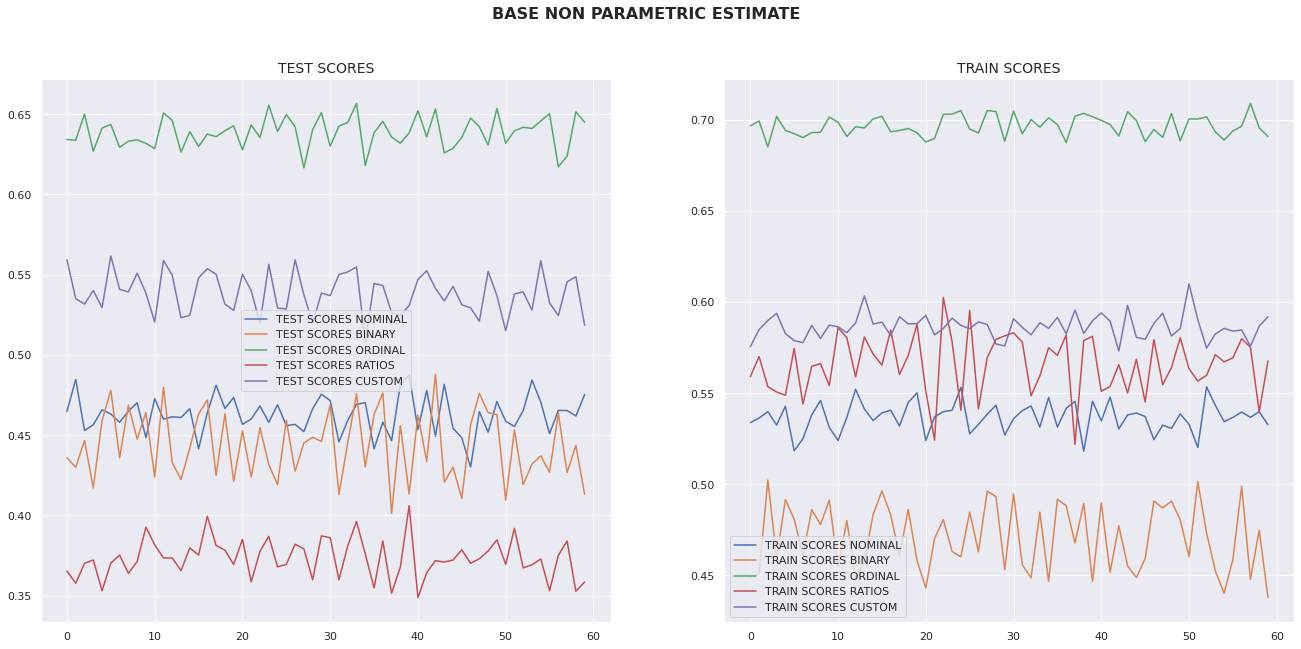

In [12]:
## cl_weight = sklearn.utils.compute_class_weight(class_weight='balanced',classes=[0,1,2],y=raw_data.target)
# cls_weight = {x:cl_weight[x] for x in range(3)}
N_JOBS=24
clf = RandomForestClassifier(class_weight='balanced',n_jobs=N_JOBS,max_depth=5)
# clf = DecisionTreeClassifier(random_state=42,max_depth=5)
REPEAT=20
fig, ax = plt.subplots(1,2,figsize=(20,10))
with parallel_backend('loky',n_jobs=N_JOBS):
    # Nominal
    transformed_bin_scores = cross_validate(clf,nominal_data,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=REPEAT,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=N_JOBS)
    disp1 = ax[0].plot(transformed_bin_scores['test_score'],label='Test Scores NOMINAL'.upper())
    disp2 = ax[1].plot(transformed_bin_scores['train_score'],label='Train Scores NOMINAL'.upper())
    # Binary
    transformed_bin_scores = cross_validate(clf,binary_data,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=REPEAT,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=N_JOBS)
    disp1 = ax[0].plot(transformed_bin_scores['test_score'],label='Test Scores BINARY'.upper())
    disp2 = ax[1].plot(transformed_bin_scores['train_score'],label='Train Scores BINARY'.upper())
    # Ordinal
    transformed_bin_scores = cross_validate(clf,ordinal_data,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=REPEAT,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=N_JOBS)
    disp1 = ax[0].plot(transformed_bin_scores['test_score'],label='Test Scores Ordinal'.upper())
    disp2 = ax[1].plot(transformed_bin_scores['train_score'],label='Train Scores Ordinal'.upper())
    # Ratios
    transformed_bin_scores = cross_validate(clf,ratios_data,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=REPEAT,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=N_JOBS)
    disp1 = ax[0].plot(transformed_bin_scores['test_score'],label='Test Scores Ratios'.upper())
    disp2 = ax[1].plot(transformed_bin_scores['train_score'],label='Train Scores Ratios'.upper())
    # CUSTOM
    custom_cols = ['binary__literal','binary__sum','ordinal__norm']
    custom_data = raw_data.loc[:,custom_cols]
    transformed_bin_scores = cross_validate(clf,custom_data,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=REPEAT,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=N_JOBS)
    disp1 = ax[0].plot(transformed_bin_scores['test_score'],label='Test Scores CUSTOM'.upper())
    disp2 = ax[1].plot(transformed_bin_scores['train_score'],label='Train Scores CUSTOM'.upper())
    ax[0].set_title('Test Scores'.upper(), fontsize = 14)
    ax[1].set_title('Train Scores'.upper(), fontsize = 14)
    s  = ax[0].legend()
    s  = ax[1].legend()
    disp = plt.suptitle('Base Non Parametric Estimate'.upper(),fontweight='heavy',fontsize = 16)

NameError: name 'raw_data_ohe' is not defined

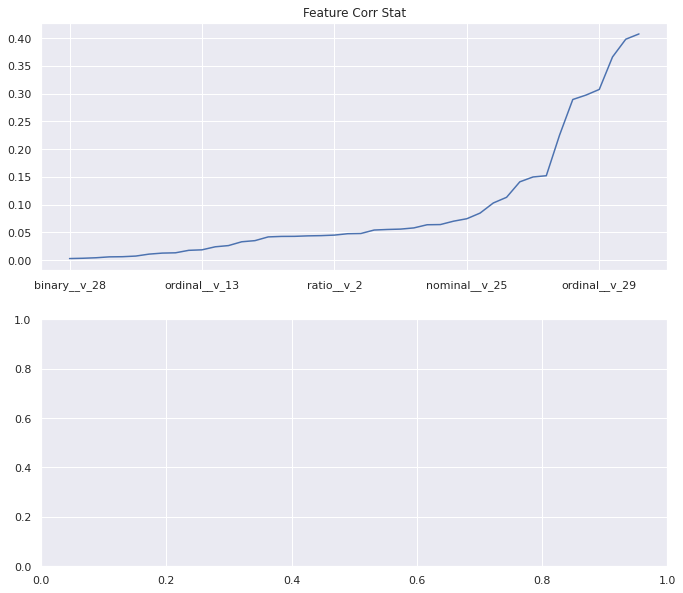

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
disp = raw_data.corrwith(raw_data.target,
                         method='pearson').abs().sort_values().iloc[:-1].plot(
                             title="Feature Corr Stat", ax=ax[0])
disp = raw_data_ohe.corrwith(raw_data.target,
                         method='pearson').abs().sort_values().iloc[:-1].plot(
                             title="Feature Corr Stat (OHE)", ax=ax[1])
# pd.DataFrame.plot

In [2]:
from prince import MCA,FAMD,MFA
X_combined = pd.concat([raw_data_ohe.loc[:,raw_data_ohe_eval.columns],raw_data_ohe_eval],ignore_index=True,axis=0)
X_train_data = raw_data_ohe.loc[:,raw_data_ohe_eval.columns]
def optimal_components(mca,pca=None):
    mca_i = 0
    result = {}
    
    col_masses = mca.col_masses_.sort_values(ascending=False)
    for i in range(3,len(col_masses)):
        if col_masses.iloc[:i].sum()/col_masses.sum() > 0.99:
            print(i)
            mca_i=i
            break
    result[mca.__class__.__name__] = mca_i
    # 630

    #510
    if type(pca) == sklearn.decomposition._pca.PCA:
        pca_i = 0
        d = pca.explained_variance_ratio_
        for i in range(3,len(d)):
            if d[:i].sum()/d.sum() > 0.99:
                print(i)
                pca_i=i
                break
        result[pca.__class__.__name__] = pca_i
    
#     result = {}
    return result
# print(optimal_components(mca,pca=pca))
# print(optimal_components(mca_train,pca=pca_train))
def categorise(df):
    categorical_data = df.loc[:,ordinal+nominal]
    df.loc[:,ordinal+nominal] = categorical_data.astype('object')
    df.loc[:,binary] = df.loc[:,binary].astype(np.float64)
    return df

pca = PCA(svd_solver='full')
category_pca = pca.fit_transform(X_combined.loc[:,nominal_ohe+ordinal_ohe])

In [3]:
pca_i = 0
d = pca.explained_variance_ratio_
for i in range(3,len(d)):
    if d[:i].sum()/d.sum() > 0.99:
        print(i)
        pca_i=i
        break

553


In [41]:
len(nominal_ohe)

645

In [36]:
len(ordinal + ['binary__literal','ordinal__norm','binary__sum']+ratios)

28

### WS1

Logistic Regression
****************************************
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       621
           1       0.74      0.68      0.71       932
           2       0.29      0.37      0.32       345

    accuracy                           0.61      1898
   macro avg       0.56      0.56      0.56      1898
weighted avg       0.63      0.61      0.62      1898




SVC
****************************************
              precision    recall  f1-score   support

           0       0.57      0.51      0.53       621
           1       0.62      0.51      0.56       932
           2       0.19      0.31      0.23       345

    accuracy                           0.47      1898
   macro avg       0.46      0.44      0.44      1898
weighted avg       0.52      0.47      0.49      1898



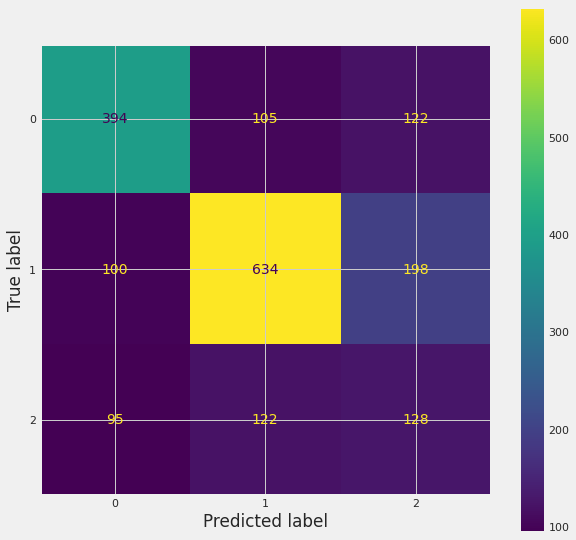

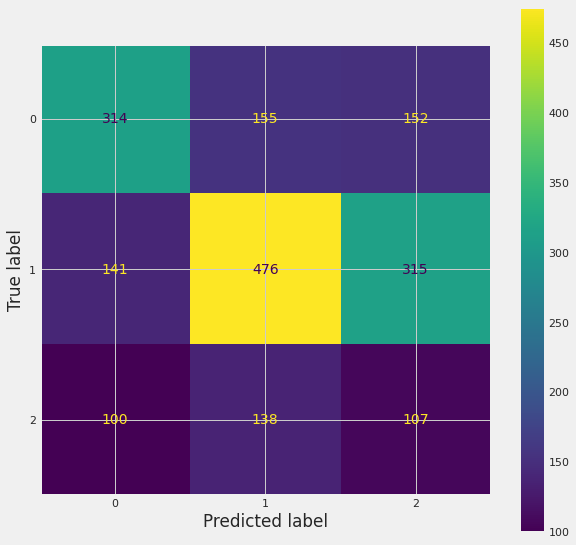

In [46]:
"""
PCA - For Data
"""
X = raw_data_ohe.loc[:,raw_data_ohe_eval.columns]
y = raw_data.target

cl_weight = sklearn.utils.compute_class_weight(class_weight='balanced',classes=[0,1,2],y=y)
cls_weight = {i:cl_weight[i] for i in range(3)}
# cls_weight[2] = cls_weight[2]

kernel_pca = KernelPCA(n_components=28,kernel='sigmoid',eigen_solver='dense')
"""
ColumnTransformer
"""
trf = ColumnTransformer([
    ('pca_binary',sklearn.kernel_approximation.RBFSampler(n_components=300,random_state=42),nominal_ohe+ordinal_ohe+binary),
    # ('pca_discrete',kernel_pca,ordinal+['binary__literal','ordinal__norm','binary__sum']),
    ('stdscl',make_pipeline(kernel_pca),ordinal + ['binary__literal','ordinal__norm','binary__sum']+ratios)
],sparse_threshold=0, remainder='passthrough',n_jobs=-1)


"""
Model
"""

svc = SVC(probability=True,class_weight='balanced',kernel='rbf',random_state=42,break_ties=False,tol=1e-08,gamma='auto',shrinking=True,C=200)

    
model = LogisticRegressionCV(class_weight='balanced',fit_intercept=False,multi_class='ovr',max_iter=10000,random_state=42,n_jobs=24,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=30),scoring='f1_macro',solver='lbfgs',Cs=100)

"""
Final PipeLine
"""

clf_svc = Pipeline([
    ('prep',trf),
    ('est',svc)
],)
clf = Pipeline([
    ('prep',trf),
    ('est',model)
],)
# clf = make_imb_pipeline(trf,model)
with parallel_backend('loky',n_jobs=24):
    # transformed_bin_scores = cross_validate(clf,X,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=2,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=-1)
    # disp = plt.plot(transformed_bin_scores['test_score'],label='Test Scores'.upper())
    X_train, X_test, y_train, y_test = gen_train_test(X,y, 0.5)
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    y_pred_svc = clf_svc.fit(X_train,y_train).predict(X_test)
    fig1,ax1 = plt.subplots(1,1,figsize=(9,9))
    plt.style.use('fivethirtyeight')
    print("Logistic Regression")
    print("*"*40)
    print(classification_report(y_test,y_pred))    
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax1)
    print('\n\n')
    print("SVC")
    print("*"*40)
    fig2,ax2 = plt.subplots(1,1,figsize=(9,9))
    print(classification_report(y_test,y_pred_svc))    
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc,ax=ax2)


TypeError: fit() missing 1 required positional argument: 'y'

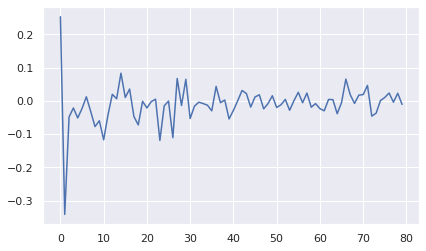

In [14]:
import copy
F = raw_data.loc[:,raw_data_eval.columns]
y = raw_data.target
K = 150
selector = SelectKBest(score_func=mutual_info_classif,k=150)
generator = make_union(PolynomialFeatures(degree=(2,2),interaction_only=True,include_bias=False),SplineTransformer(extrapolation='continue',knots='quantile',n_knots=3,degree=2))
# f_uni = make_union(make_column_selector)
ct = make_column_transformer((generator,ordinal+ratios+binary),remainder='drop',sparse_threshold=0,n_jobs=-1)
with parallel_backend('loky'):
    final_ = make_pipeline(PowerTransformer(),KernelPCA(n_components=80,kernel='linear',eigen_solver='arpack',n_jobs=-1))
    new_features = make_pipeline(ct,selector,final_)
    F_new = new_features.fit_transform(F,y)
    F_enc = pd.DataFrame(F_new)


disp = F_enc.corrwith(raw_data.target).plot()
svc = SVC(probability=True,class_weight='balanced',kernel='poly',degree=1,random_state=42,break_ties=True,tol=1e-08,gamma='auto',shrinking=True,decision_function_shape='ovr',C=221.42857142857144,cache_size=1024,verbose=False)

model = LogisticRegressionCV(class_weight='balanced',fit_intercept=True,max_iter=10000,random_state=42,n_jobs=-1,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2,random_state=30),scoring='f1_macro',solver='lbfgs',Cs=100)
X_nom = raw_data_ohe.loc[:,nominal_ohe]
X_ord = raw_data_ohe.loc[:,ordinal_ohe]
# scores = pd.DataFrame()
# # 645,358 = (N[Nominal],N[Ordinal])
# K = 200
# KPCA = KernelPCA(n_components=K,)
# selector = SelectKBest(score_func=mutual_info_classif,k=K)
# selector.fit(KPCA.fit_transform(X_nom),y)
# scores['nom'] = pd.Series(selector.scores_,index=KPCA.get_feature_names_out())
# scores.sort_values(by='nom',ascending=False,inplace=True)
# scores.plot()
# # selector.scores_

enc = make_pipeline(BernoulliRBM(random_state=42),SelectKBest(50))
X_t = enc.fit_transform(X_nom)

model = LogisticRegressionCV(class_weight='balanced',fit_intercept=True,max_iter=10000,random_state=42,n_jobs=-1,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2,random_state=30),scoring='f1_macro',solver='lbfgs',Cs=100)
# clf = make_pipeline(StandardScaler(),KernelPCA(n_components=120,kernel='linear',eigen_solver='arpack',n_jobs=-1),model)
scores = cross_validate(model,X_t,y,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2),n_jobs=-1,scoring='f1_macro',return_train_score=True)
with parallel_backend('loky',n_jobs=24):

    scores1 = cross_validate(model,X_t,y,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2),n_jobs=-1,scoring='f1_macro',return_train_score=True)
    scores2 = cross_validate(svc,X_t,y,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2),n_jobs=-1,scoring='f1_macro',return_train_score=True)

scores1,scores2

In [10]:
X_t.shape

(3796, 256)

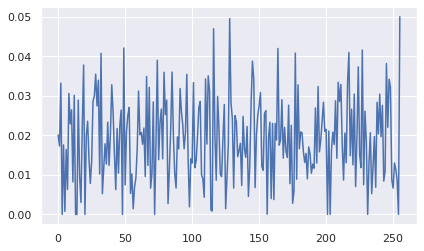

In [13]:
mic = mutual_info_classif(X_t,raw_data.target)
plt.plot(mic)

In [ ]:
import copy
F = raw_data.loc[:,ordinal+ratios+binary]
y = raw_data.target
K = 50
transformer = make_union(PolynomialFeatures(degree=3,interaction_only=True,include_bias=False),SplineTransformer(extrapolation='continue',knots='quantile',n_knots=3,degree=2))
# f_uni = make_union(make_column_selector)
F_enc = pd.DataFrame(transformer.fit_transform(F),columns=transformer.get_feature_names_out())
F_enc.loc[:,ordinal] = raw_data.loc[:,ordinal+ratios+binary]
chi,p = chi2(F_enc,raw_data.target)

selector_1 = SelectKBest(score_func=chi2,k=K)
selector_1.fit(F_enc,y)
fs1 = selector_1.get_feature_names_out()

selector_2 = SelectKBest(score_func=mutual_info_classif,k=K)
selector_2.fit(F_enc,y)
fs2 = selector_2.get_feature_names_out()

selector_3 = SelectKBest(score_func=f_classif,k=K)
selector_3.fit(F_enc,y)
fs3 = selector_3.get_feature_names_out()

all_f= list(fs1) + list(fs2) + list(fs3)
perf_ = dict(Counter(all_f,))
perf = copy.deepcopy(perf_)
for k in perf_:
    if perf_[k] !=3:
        del perf[k]
perf

In [52]:
kap = sklearn.kernel_approximation.RBFSampler(n_components=len(nominal_ohe+ordinal_ohe+binary)-1,random_state=42,gamma=10)
kap.fit_transform(raw_data_ohe.loc[:,nominal_ohe+ordinal_ohe+binary])

array([[ 0.00428458, -0.03784979, -0.04071697, ..., -0.0303165 ,
         0.00637168, -0.03985478],
       [-0.04102376, -0.01171389,  0.04449635, ...,  0.01312533,
         0.00600175,  0.04186554],
       [-0.04437807,  0.043097  ,  0.01878206, ..., -0.0041997 ,
         0.04406146,  0.03055691],
       ...,
       [-0.01282514, -0.01751635,  0.00212796, ..., -0.0099373 ,
        -0.02458355,  0.01457748],
       [-0.04104716,  0.02399673,  0.01069567, ..., -0.04438416,
        -0.01256761,  0.04069326],
       [ 0.03299767,  0.00755484,  0.0435766 , ..., -0.04326809,
         0.04416576,  0.00986551]])

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      1243
           1       0.49      0.39      0.44      1863
           2       0.15      0.24      0.19       690

    accuracy                           0.35      3796
   macro avg       0.34      0.33      0.33      3796
weighted avg       0.39      0.35      0.37      3796

              precision    recall  f1-score   support

           0       0.39      0.29      0.33      1243
           1       0.56      0.54      0.55      1863
           2       0.19      0.30      0.23       690

    accuracy                           0.41      3796
   macro avg       0.38      0.37      0.37      3796
weighted avg       0.44      0.41      0.42      3796



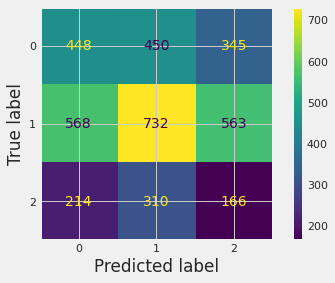

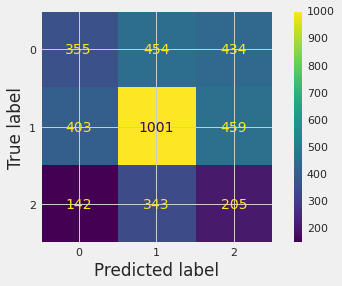

In [46]:
from sklearn.mixture import *
X = raw_data.loc[:,raw_data_eval.columns]
y = raw_data.target
kernel = RBFSampler(random_state=42,n_components=len(nominal+ordinal))
# Try GMMs using different types of covariances.
n_classes=3
estimators = {
    cov_type: BayesianGaussianMixture(
        n_components=n_classes, covariance_type=cov_type, n_init=20,max_iter=100, random_state=42,init_params='kmeans',tol=0.001
    )
    for cov_type in ["spherical","full"]
}
ct = make_column_transformer((kernel,nominal_ohe+ordinal_ohe),(PCA(svd_solver='full'),binary+ordinal+ratios+['binary__literal','ordinal__norm','binary__sum']),remainder='passthrough',sparse_threshold=0,n_jobs=-1)
X_ = {}
preds_ = {}

for k,estimator in estimators.items():
    # ct = make_column_transformer(('passthrough',X.col))
    # estimator.means_init = np.array(
    #     [X.loc[:,nominal_ohe+ordinal_ohe][y == i].mean(axis=0) for i in range(n_classes)]
    # )
    with parallel_backend('threading',n_jobs=24):
        estimator.means_init = np.array(
            [X[y == i].mean(axis=0) for i in range(n_classes)]
        )

        trf = make_pipeline(estimator)
        X_[k] = trf.fit(X)
    preds_[k]=trf.predict_proba(X)
    ConfusionMatrixDisplay.from_predictions(y,trf.predict(X))
    print(classification_report(y,trf.predict(X)))
    


In [41]:
# for k,p in preds_:
#     pr = pd.DataFrame()
preds_

{'spherical': array([[4.96499214e-69, 5.59155655e-10, 1.48877622e-17, 9.99999999e-01,
         2.12736936e-23],
        [2.69691355e-43, 5.76496132e-31, 1.98487337e-24, 5.64561581e-33,
         1.00000000e+00],
        [2.61908369e-24, 2.40449986e-31, 9.99999991e-01, 8.92950134e-36,
         9.23361039e-09],
        ...,
        [2.55354522e-46, 2.84253877e-19, 9.26393291e-11, 9.99674247e-01,
         3.25753329e-04],
        [1.00000000e+00, 8.72331549e-49, 2.98068948e-25, 9.20003649e-63,
         7.47492834e-13],
        [4.47391578e-68, 9.99998000e-01, 1.15284303e-16, 2.00048097e-06,
         5.03645565e-27]]),
 'full': array([[1.76732220e-030, 1.11324813e-073, 1.00000000e+000,
         1.09210009e-015, 2.22904897e-014],
        [1.00000000e+000, 7.65519627e-143, 0.00000000e+000,
         6.21345329e-192, 0.00000000e+000],
        [8.00648382e-031, 1.90225226e-098, 1.00000000e+000,
         3.02602413e-022, 1.22296262e-012],
        ...,
        [1.00000000e+000, 6.63657825e-284, 0.

In [ ]:
# kernel = sklearn.gaussian_process.kernels.PairwiseKernel(metric='additive_chi2')
# ct = make_column_transformer((kernel,nominal+ordinal),(PCA(svd_solver='full'),binary+ratios+['binary__literal','ordinal__norm','binary__sum']),remainder='passthrough',sparse_threshold=0,n_jobs=-1)
from sklearn.mixture import *
X = raw_data_ohe.loc[:,raw_data_ohe_eval.columns]
y = raw_data.target
# X_t = ct.fit_transform(X)
# kernel(X,y.to_numpy().reshape(-1,1))
kernel = RBFSampler(random_state=42,n_components=len(nominal_ohe+ordinal_ohe))
# Try GMMs using different types of covariances.
n_classes=3
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, n_init=10, random_state=42
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}
ct = make_column_transformer((kernel,nominal_ohe+ordinal_ohe),(PCA(svd_solver='full'),binary+ordinal+ratios+['binary__literal','ordinal__norm','binary__sum']),remainder='passthrough',sparse_threshold=0,n_jobs=-1)
X_ = {}
for k,estimator in estimators.items():
    ct = make_column_transformer(('passthrough',nominal_ohe+ordinal_ohe))
    trf = make_pipeline(ct,estimator)
    X_[k] = trf.fit(X)

In [19]:
lf = clf[-1]
lf.C_

array([0.35938137, 0.35938137, 0.35938137])

In [67]:
y_ovr = LabelBinarizer().fit_transform(y)
y_df = pd.DataFrame(y_ovr,index=raw_data.index,columns=["0","1","2"])

In [86]:
X_transformed = trf.fit_transform(X)
from tqdm import trange
# mics = []
y_ovr = LabelBinarizer().fit_transform(y)
y_df = pd.DataFrame(y_ovr,index=raw_data.index,columns=["0","1","2"])

mics = pd.DataFrame(index=X.columns)
mics_transformed = pd.DataFrame(index=np.arange(X_transformed.shape[1]))

# for i in range(3,10):
def get_info_mic(idx,X=X,y=y_df["1"]):
    global mics,mics_transformed
    mic = mutual_info_classif(X,y,random_state=42,n_neighbors=idx)
    mics[f'k__{idx}'] = mic
    mic = mutual_info_classif(X_transformed,y,random_state=42,n_neighbors=idx)
    mics_transformed[f'k__{idx}'] = mic
    
with parallel_backend('threading',n_jobs=-1):
    Parallel()(delayed(get_info_mic)(i) for i in range(3,10))

mics['mean'] = mics.loc[:,['k__3', 'k__4', 'k__5', 'k__6', 'k__7', 'k__8', 'k__9', ]].mean(axis=1)
mics_transformed['mean'] = mics_transformed.loc[:,['k__3', 'k__4', 'k__5', 'k__6', 'k__7', 'k__8', 'k__9',]].mean(axis=1)
# mics_transformed['mean'] = mics_transformed.mean(axis=1)
mics.sort_values(by='mean',ascending=False,inplace=True)
mics_transformed.sort_values(by='mean',ascending=False,inplace=True)

import copy
def mic_result_analyze(df):
    valid_mic = df[df['mean']>0].index
    all_f = df.index
    invalid_mic = all_f.difference(valid_mic)
    print('valid fs',len(valid_mic))
    counts = {'ordinal':0,'nominal':0,'binary':0,'ratio':0}
    detailed_counts = {x:0 for x in ordinal+nominal+binary+ratios}
    
    for i in invalid_mic:
        for k in counts:
            if k in i:
                counts[k]+=1

    for i in invalid_mic:
        for k in detailed_counts:
            if k in i:
                detailed_counts[k]+=1
    detailed_counts1 = copy.deepcopy(detailed_counts)
    for k in detailed_counts:
        if detailed_counts[k]>0:
#             print(f'{k}:  {detailed_counts[k]}')
            pass
        else:
            del detailed_counts1[k]
    return counts,detailed_counts1,valid_mic

def mic_info(mics,mics_transformed):
    valid_mic_tr = len(mics_transformed[mics_transformed['mean']>0.003].index)
    print(f'valid fs after transformation: {valid_mic_tr}')
    # print(f'max mic {mics['mean'].max()}')
    print(mics['mean'].idxmax(), mics['mean'].max())
    print(mics_transformed['mean'].idxmax(), mics_transformed['mean'].max())
    
counts,detailed_counts,valid = mic_result_analyze(mics)
mic_info(mics,mics_transformed)

valid fs 817
valid fs after transformation: 781
ordinal__v_6 0.19543170540478966
1011 0.10547380138655625


In [89]:
mics_db

{'0': [{'ordinal': 60, 'nominal': 151, 'binary': 1, 'ratio': 1},
  {'ordinal__v_0': 4,
   'ordinal__v_10': 3,
   'ordinal__v_13': 4,
   'ordinal__v_15': 3,
   'ordinal__v_17': 6,
   'ordinal__v_19': 3,
   'ordinal__v_22': 5,
   'ordinal__v_23': 5,
   'ordinal__v_24': 8,
   'ordinal__v_29': 5,
   'ordinal__v_31': 6,
   'ordinal__v_33': 4,
   'ordinal__v_5': 2,
   'ordinal__v_6': 2,
   'nominal__v_12': 11,
   'nominal__v_18': 18,
   'nominal__v_20': 22,
   'nominal__v_21': 6,
   'nominal__v_25': 20,
   'nominal__v_3': 52,
   'nominal__v_32': 24,
   'nominal__v_4': 22,
   'binary__v_1': 1,
   'binary__v_14': 1,
   'ratio__v_37': 1},
  Index(['ordinal__v_6', 'ordinal__v_22', 'ord_norm', 'ordinal__v_19',
         'ordinal__v_6_0', 'bin_literal', 'ordinal__v_22_0', 'ordinal__v_29',
         'ordinal__v_29_0', 'ordinal__v_19_0',
         ...
         'nominal__v_18_79', 'nominal__v_3_96', 'nominal__v_3_94',
         'nominal__v_4_90', 'nominal__v_4_4', 'nominal__v_3_28',
         'ordinal__v_

In [87]:
mics_db['1'] = [counts,detailed_counts,valid]

In [88]:
import shelve
with shelve.open('../data/mic_stats.shelf') as stats_db:
    stats_db['mic'] = mics_db

              precision    recall  f1-score   support

           0       0.82      0.65      0.72       249
           1       0.81      0.79      0.80       373
           2       0.46      0.65      0.54       138

    accuracy                           0.72       760
   macro avg       0.69      0.70      0.69       760
weighted avg       0.75      0.72      0.73       760



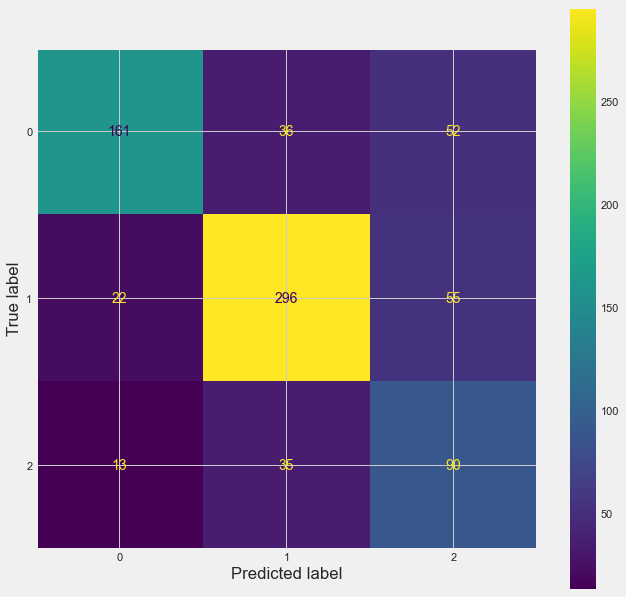

In [21]:
X = raw_data.loc[:,high_variable_f[3]]
y = raw_data.target
X_train, X_test, y_train, y_test = gen_train_test(X,y, 0.2)
model = SVC(probability=True,class_weight='balanced',kernel='linear',random_state=42,break_ties=True,tol=0.0001,gamma='auto',shrinking=False,decision_function_shape='ovr',C=125.71428571428572)
model = SVC(probability=True,class_weight='balanced',kernel='linear',random_state=42,break_ties=False,tol=1e-08,gamma='auto',shrinking=False,decision_function_shape='ovo',C=221.42857142857144)

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,HalvingRandomSearchCV

with parallel_backend('loky'):
    X_train_enc = trf.fit_transform(X_train,y_train)
    X_test_enc = trf.transform(X_test)
    # fit_transform
    clf = Pipeline([
        ('prep',trf),
        ('svc',model)
    ],memory=Memory(DATA_SAVE_PATH,verbose=0))
    param_distributions = {
        'svc__tol': [10**(-x) for x in range(3,9)],
        'svc__C': np.linspace(150,250,num=50),
    }
    model_search = HalvingRandomSearchCV(clf,param_distributions=param_distributions,scoring='f1_macro',random_state=42,return_train_score=True,n_jobs=-1,verbose=1,factor=2,cv=RepeatedStratifiedKFold(n_splits=2))
    # model_search.fit(X,y)
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    report_model(y_test,y_pred)

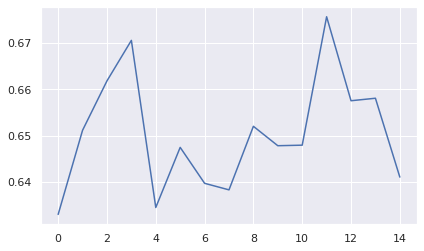

In [129]:
mca_comp =  MCA(n_components=610,benzecri=False,random_state=42,n_iter=20).fit_transform(pd.get_dummies(raw_data.loc[:,nominal+ordinal],columns=nominal+ordinal))
X = pd.concat([raw_data.loc[:,binary+ratios+['binary__literal','ordinal__norm','binary__sum']],mca_comp],axis=1,ignore_index=True)
with parallel_backend('loky'):
    clf = LogisticRegressionCV(class_weight='balanced',n_jobs=-1,random_state=42,cv=StratifiedKFold(n_splits=3),multi_class='ovr',max_iter=10000)
    transformed_bin_scores = cross_validate(clf,X,raw_data.target, cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=5,random_state=30), scoring='f1_macro', return_train_score=True,n_jobs=24)
    disp = plt.plot(transformed_bin_scores['test_score'],label='Test Scores NOMINAL'.upper())

#### COV estimation

In [6]:
# X= raw_data.drop(['target'],axis=1)
X_raw = raw_data.loc[:,nominal+ordinal+binary+['binary__literal','ordinal__norm','binary__sum']+ratios]
X = pd.concat([raw_data.loc[:,raw_data_eval.columns],raw_data_eval],ignore_index=True,axis=0)
from joblib import Parallel
X_eval = raw_data_eval
cov_estimators = [EmpiricalCovariance(),MinCovDet(),MinCovDet(),OAS(),LedoitWolf(),ShrunkCovariance()]
with parallel_backend('threading',n_jobs=-1):
    fitted_cov_estimators = [x.fit(X) for x in cov_estimators]
    

cov_scores_eval = [x.score(X_eval) for x in fitted_cov_estimators]
cov_matrices  = [pd.DataFrame(est.covariance_, columns=est.feature_names_in_,index = est.feature_names_in_)
                for est in cov_estimators]


import copy
T = 0.7
pos_variable_f = [{c:[] for c in X.columns} for _ in range(len(cov_matrices))]
neg_variable_f = [{c:[] for c in X.columns} for _ in range(len(cov_matrices))]
for idx,C in enumerate(cov_matrices):
    cols = list(C.columns)
    for f in cols:
        # not_same_f = cols.remove('f')
        not_same_f = copy.deepcopy(cols)
        not_same_f.remove(f)
        cov_f = C[f].loc[not_same_f]
        pos_imp_co_f = cov_f[cov_f>T]
        neg_imp_co_f = cov_f[cov_f<-T]
        pos_variable_f[idx][f].extend(list(pos_imp_co_f.index))
        neg_variable_f[idx][f].extend(list(neg_imp_co_f.index))
pos_variable_f = [{prel_key:prel[prel_key] for prel_key in prel if len(prel[prel_key])!=0} for prel in pos_variable_f]
neg_variable_f = [{nrel_key:nrel[nrel_key] for nrel_key in nrel if len(nrel[nrel_key])!=0} for nrel in neg_variable_f]


prel_coll = [set() for _ in range(len(cov_matrices))]
nrel_coll = [set() for _ in range(len(cov_matrices))]
for idx,rel in enumerate(pos_variable_f):
    for features in rel.values():
        for f in features:
            prel_coll[idx].add(f)
    for feature in rel.keys():
        # for f in features:
        prel_coll[idx].add(feature)
for idx,rel in enumerate(neg_variable_f):
    for features in rel.values():
        for f in features:
            nrel_coll[idx].add(f)
    for feature in rel.keys():
        # for f in features:
        nrel_coll[idx].add(feature)

nrel_coll = [list(L) for L in nrel_coll]
prel_coll = [list(L) for L in prel_coll]
high_variable_f = [list(set(prel_coll[idx]+nrel_coll[idx])) for idx in range(len(cov_matrices))]
total_feature_set = set(raw_data.drop(['target'],axis=1).columns)
low_variable_f = [list(total_feature_set-set(high_f)) for high_f in high_variable_f]


In [4]:
[len(f) for f in high_variable_f]

[31, 23, 22, 31, 31, 31]

In [9]:
master_scores_nrel = []
FOLDS = dict(n_splits=2,n_repeats=5)
with parallel_backend('loky'):
    for idx in range(len(prel_coll)):
        X = raw_data.loc[:,nrel_coll[idx]]
        y = raw_data.target
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced',max_depth=5)
        clf = OneVsOneClassifier(model,n_jobs=-1)
        scores = cross_validate(clf,X,y,cv=RepeatedStratifiedKFold(**FOLDS),n_jobs=-1,scoring='f1_macro',return_train_score=True)
        master_scores_nrel.append({'test_score':scores['test_score'].mean(),'train_score':scores['train_score'].mean()})
master_scores_nrel

[{'test_score': 0.5785924277327665, 'train_score': 0.6585453999147463},
 {'test_score': 0.6075286090934575, 'train_score': 0.6794388477920188},
 {'test_score': 0.5782064226677488, 'train_score': 0.654807326822232},
 {'test_score': 0.5831022220184742, 'train_score': 0.655472489087965},
 {'test_score': 0.5801730932164297, 'train_score': 0.6581740881141818},
 {'test_score': 0.5841307230476508, 'train_score': 0.6559378978490297}]

In [10]:
master_scores_prel = []
with parallel_backend('loky'):
    for idx in range(len(prel_coll)):
        X = raw_data.loc[:,prel_coll[idx]]
        y = raw_data.target
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced',max_depth=5)
        clf = OneVsRestClassifier(model,n_jobs=-1)
        scores = cross_validate(clf,X,y,cv=RepeatedStratifiedKFold(**FOLDS),n_jobs=-1,scoring='f1_macro',return_train_score=True)
        master_scores_prel.append({'test_score':scores['test_score'].mean(),'train_score':scores['train_score'].mean()})

master_scores_prel

[{'test_score': 0.6158924254097731, 'train_score': 0.709544429319378},
 {'test_score': 0.6099294365521402, 'train_score': 0.6954426252028738},
 {'test_score': 0.6114344325706644, 'train_score': 0.706066164325669},
 {'test_score': 0.6136891697492197, 'train_score': 0.709922058177043},
 {'test_score': 0.6184138450953212, 'train_score': 0.7064879738600393},
 {'test_score': 0.6145486614585046, 'train_score': 0.7091222842760403}]

In [6]:
from tqdm import trange,tqdm
master_scores = []
with parallel_backend('loky'):
    for idx in trange(len(prel_coll)):
        X = raw_data.loc[:,high_variable_f[idx]]
        y = raw_data.target
        mask = gen_categorical_mask(X)
        
        # model = HistGradientBoostingClassifier(random_state=42,categorical_features=mask,min_samples_leaf=3,max_leaf_nodes=3,max_iter=100, learning_rate=0.12)
        # clf = OneVsOneClassifier(model,n_jobs=-1)
        model = HistGradientBoostingClassifier(random_state=42,categorical_features=mask,)
        # model = DecisionTreeClassifier(random_state=42, class_weight='balanced',max_depth=5)
        # clf = OneVsRestClassifier(model,n_jobs=-1)
        model = LogisticRegressionCV(class_weight='balanced',fit_intercept=False,multi_class='ovr',max_iter=10000,random_state=42,l1_ratios=np.linspace(0.0,1.0,num=5), penalty='elasticnet',solver='saga')
        # model = LogisticRegressionCV(class_weight='balanced',fit_intercept=False,multi_class='ovr',max_iter=10000,random_state=42,penalty='elasticnet',solver='saga',cv=StratifiedKFold(n_splits=2),n_jobs=-1,l1_ratios=np.linspace(0.0,1.0,num=5))
        model = LogisticRegressionCV(class_weight='balanced',fit_intercept=False,multi_class='ovr',max_iter=100000,random_state=42,n_jobs=-1,cv=StratifiedKFold(n_splits=2),scoring='f1_macro',solver='lbfgs',Cs=10)
        LG_clf = model
        scores = cross_validate(LG_clf,X,y,cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=1),n_jobs=-1,scoring='f1_macro',return_train_score=True,return_estimator=True)
        master_scores.append({'test_score':scores['test_score'].mean(),'train_score':scores['train_score'].mean()})

master_scores

100%|██████████| 6/6 [01:18<00:00, 13.04s/it]


[{'test_score': 0.6678181038259231, 'train_score': 0.6840862909290428},
 {'test_score': 0.6472813173069205, 'train_score': 0.6608969842301045},
 {'test_score': 0.6655398417724618, 'train_score': 0.6849681512779444},
 {'test_score': 0.6603110142107707, 'train_score': 0.6885441346242575},
 {'test_score': 0.6623035981011279, 'train_score': 0.6895983020158845},
 {'test_score': 0.6691395302287038, 'train_score': 0.6807327407267107}]

In [19]:
sfs_estimator = LogisticRegression(class_weight='balanced',multi_class='ovr',solver='lbfgs',max_iter=10000,fit_intercept=False,random_state=42,n_jobs=-1,tol=0.000001,)
sfs = SequentialFeatureSelector(estimator=sfs_estimator,n_features_to_select='auto',tol=0.001,scoring='f1_macro',n_jobs=-1,direction='backward',cv=StratifiedKFold(n_splits=2))
rfecv = RFECV(sfs_estimator,cv=StratifiedKFold(n_splits=2),scoring='f1_macro',n_jobs=-1,)

Started Fitting Transformer
Started training classifier
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       249
           1       0.83      0.78      0.80       373
           2       0.45      0.63      0.52       138

    accuracy                           0.73       760
   macro avg       0.69      0.70      0.69       760
weighted avg       0.75      0.72      0.73       760



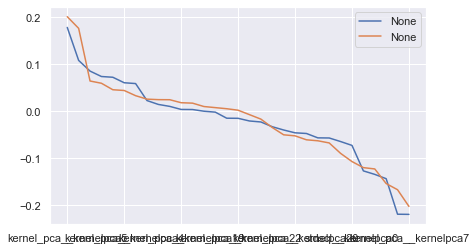

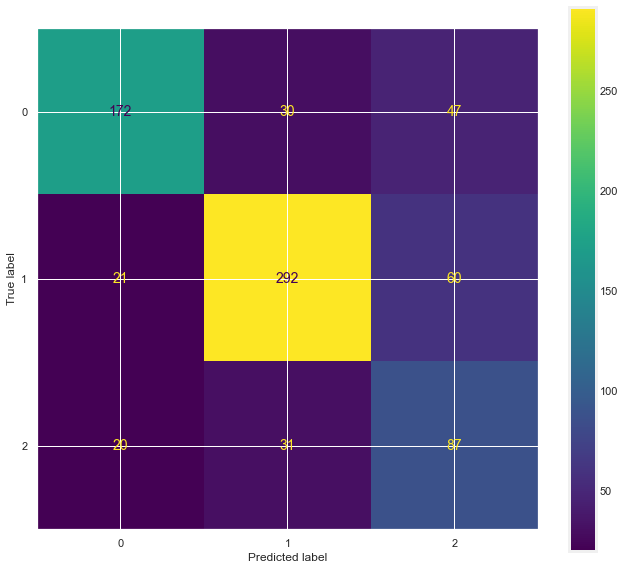

In [12]:
"""
Training Set Generation
"""
X = raw_data.loc[:,high_variable_f[3]]
y = raw_data.target
X_train, X_test, y_train, y_test = gen_train_test(X,y, 0.2)
# X_train, X_valid, y_train, y_valid = gen_train_test(X_train,y_train, 0.5)

"""
Column Selectors
"""
ordinal_cols = make_column_selector(pattern='ordinal__*')
nominal_cols = make_column_selector(pattern='nominal__*')
binary_cols  = make_column_selector(pattern='binary__*')
kpca_cols  = make_column_selector(pattern='binary__*|nominal__*|ordinal__*|bin_*|ord_*')


"""
Prep
"""
nominal_master = pd.concat([nominal_data, nominal_data_eval],axis=0)
ordinal_master = pd.concat([ordinal_data, ordinal_data_eval],axis=0)


def nominal_categories(X):
    ct = make_column_transformer((OneHotEncoder(sparse=False),nominal),sparse_threshold=0,remainder='drop')
    ct.fit(nominal_master.astype('int'))
    results = ct.named_transformers_['onehotencoder'].categories_
    category_db = {x:Categs for x, Categs in zip(nominal,results)}
    tmp =  make_column_transformer(('passthrough',nominal_cols),sparse_threshold=0,remainder='drop')
    tmp.fit(X.astype('int'))
    selected_features = [x.replace('passthrough__',"") for x in tmp.get_feature_names_out()]
    unique_categories_nom = [category_db[f] for f in selected_features]
    return unique_categories_nom


def ordinal_categories(X):
    ct = make_column_transformer((OneHotEncoder(sparse=False),ordinal),sparse_threshold=0,remainder='drop')
    ct.fit(ordinal_master)
    results = ct.named_transformers_['onehotencoder'].categories_
    category_db = {x:Categs for x, Categs in zip(ordinal,results)}
    tmp =  make_column_transformer(('passthrough',ordinal_cols),sparse_threshold=0,remainder='drop')
    tmp.fit(X)
    selected_features = [x.replace('passthrough__',"") for x in tmp.get_feature_names_out()]
    unique_categories_ord = [category_db[f] for f in selected_features]
    return unique_categories_ord


def nominal_value_counts():
    df = nominal_master.astype('int')
    df_c = {}
    for c in df.columns:
        df_c[c] = df[c].value_counts()
    return df_c


def ordinal_value_counts():
    df = ordinal_master
    df_c = {}
    for c in df.columns:
        df_c[c] = df[c].value_counts()
    return df_c


"""
MCA - For Categorical Data
"""
kernel_pca = make_pipeline(KernelPCA(kernel='cosine',random_state=42,eigen_solver='dense',n_jobs=-1,fit_inverse_transform=False))

"""
Samplers
"""
sampler_estimator = DecisionTreeClassifier(random_state=10, class_weight='balanced')
under_sampler = InstanceHardnessThreshold(random_state=42,estimator=sampler_estimator,cv=5,n_jobs=-1)
over_sampler_sampler = RandomOverSampler(random_state=42)


"""
ColumnTransformer
"""
trf = ColumnTransformer([
    ('kernel_pca',kernel_pca,kpca_cols),
    ('stdscl',make_pipeline(StandardScaler(),kernel_pca),make_column_selector(pattern='ratio__*'))
],sparse_threshold=0, remainder='passthrough',n_jobs=-1)


"""
Model
"""
model = LogisticRegressionCV(class_weight='balanced',fit_intercept=True,multi_class='ovr',max_iter=10000,random_state=42,n_jobs=-1,cv=RepeatedStratifiedKFold(n_splits=5),scoring='f1_macro',solver='lbfgs',Cs=100)


"""
Final PipeLine
"""
# clf = make_imb_pipeline(under_sampler,over_sampler,trf,model,memory=Memory(DATA_SAVE_PATH,verbose=0))
clf = make_imb_pipeline(trf,OneVsOneClassifier(model,n_jobs=-1),memory=Memory(DATA_SAVE_PATH,verbose=0))


"""
Execution
"""
def execute():
    with parallel_backend('loky'):

        print("Started Fitting Transformer")
        with parallel_backend('loky'):
            X_train_enc = trf.fit_transform(X_train,y_train)
            X_test_enc = trf.transform(X_test)
            # X_train_enc

            X_train_df = pd.DataFrame(X_train_enc,columns=trf.get_feature_names_out(),index=X_train.index)
            X_test_df = pd.DataFrame(X_test_enc,columns=trf.get_feature_names_out(),index=X_test.index)

            X_train_df.corrwith(raw_data.target.loc[X_train.index]).sort_values(ascending=False).plot()
            X_test_df.corrwith(raw_data.target.loc[X_test.index]).sort_values(ascending=False).plot()
            disp = plt.legend()

        print("Started training classifier")
        y_pred = clf.fit(X_train,y_train).predict(X_test)
    return y_pred

"""
Plotting
"""
def report_model(y_test,y_pred):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    plt.style.use('fivethirtyeight')
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)
    # scores = cr(clf,X,y,cv=RepeatedStratifiedKFold(**FOLDS),n_jobs=-1,scoring='f1_macro',return_train_score=True)

    print(classification_report(y_test,y_pred))
y_pred=execute()
report_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.65      0.72       249
           1       0.81      0.79      0.80       373
           2       0.46      0.65      0.54       138

    accuracy                           0.72       760
   macro avg       0.69      0.70      0.69       760
weighted avg       0.75      0.72      0.73       760



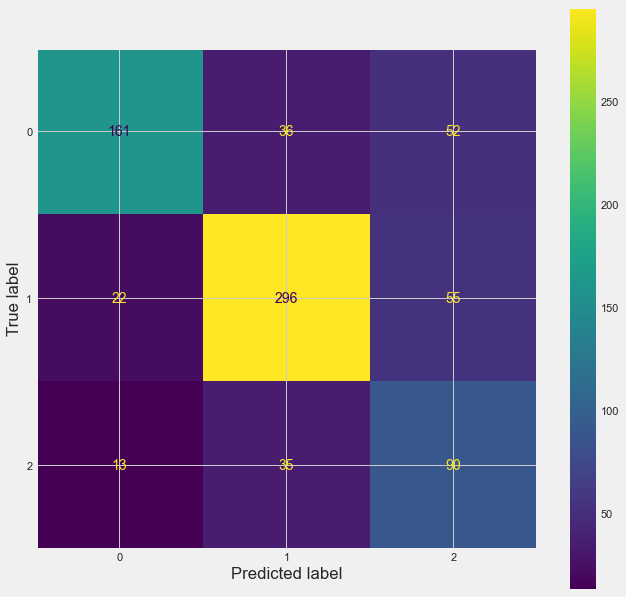

In [21]:
X = raw_data.loc[:,high_variable_f[3]]
y = raw_data.target
X_train, X_test, y_train, y_test = gen_train_test(X,y, 0.2)
model = SVC(probability=True,class_weight='balanced',kernel='linear',random_state=42,break_ties=True,tol=0.0001,gamma='auto',shrinking=False,decision_function_shape='ovr',C=125.71428571428572)
model = SVC(probability=True,class_weight='balanced',kernel='linear',random_state=42,break_ties=False,tol=1e-08,gamma='auto',shrinking=False,decision_function_shape='ovo',C=221.42857142857144)

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,HalvingRandomSearchCV

with parallel_backend('loky'):
    X_train_enc = trf.fit_transform(X_train,y_train)
    X_test_enc = trf.transform(X_test)
    # fit_transform
    clf = Pipeline([
        ('prep',trf),
        ('svc',model)
    ],memory=Memory(DATA_SAVE_PATH,verbose=0))
    param_distributions = {
        'svc__tol': [10**(-x) for x in range(3,9)],
        'svc__C': np.linspace(150,250,num=50),
    }
    model_search = HalvingRandomSearchCV(clf,param_distributions=param_distributions,scoring='f1_macro',random_state=42,return_train_score=True,n_jobs=-1,verbose=1,factor=2,cv=RepeatedStratifiedKFold(n_splits=2))
    # model_search.fit(X,y)
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    report_model(y_test,y_pred)

In [22]:
# best_clfs = [best_clf_lgcv,best_clf_svc]
import shelve
with shelve.open('../models/best_clfs.db') as mdb:
    # best_clf_lgcv = mdb['LogisticRegressionCV_KernelPCA.model']
    # best_clf_svc = mdb['SVC_Linear_KernelPCA.model']
    clf_ovo_lgcv = mdb['OVO_LogisticRegressionCV_KernelPCA.model']
    

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       249
           1       0.75      0.90      0.82       373
           2       0.52      0.27      0.35       138

    accuracy                           0.72       760
   macro avg       0.67      0.63      0.63       760
weighted avg       0.70      0.72      0.70       760



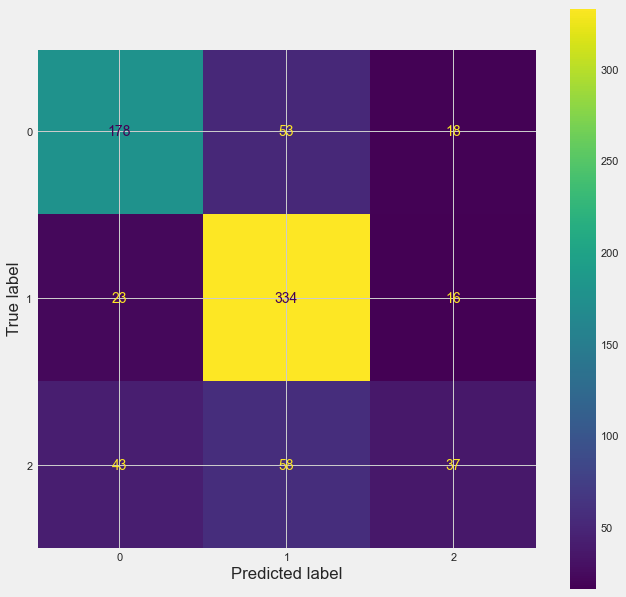

In [23]:
with open('../models/clf_hist_ord_nom_cat','rb') as fp:
    tm_clf = pickle.load(fp)
clf_hist = Pipeline([
        ('prep',trf),
        ('hist',tm_clf[1])
    ],memory=Memory(DATA_SAVE_PATH,verbose=0))
y_pred = tm_clf.fit(X_train,y_train).predict(X_test)
report_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       621
           1       0.78      0.82      0.80       932
           2       0.45      0.43      0.44       345

    accuracy                           0.71      1898
   macro avg       0.66      0.65      0.66      1898
weighted avg       0.71      0.71      0.71      1898



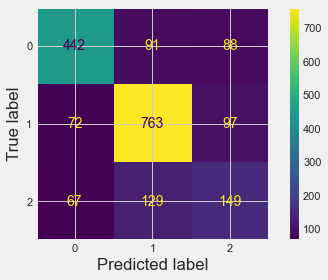

In [24]:
# model.decision_function(X)
X = raw_data.loc[:,high_variable_f[3]]
X_eval = raw_data_eval.loc[:,high_variable_f[3]]
y = raw_data.target
model = LogisticRegressionCV(class_weight='balanced',fit_intercept=False,multi_class='ovr',max_iter=100000,random_state=42,n_jobs=-1,cv=RepeatedStratifiedKFold(n_splits=5,random_state=42),scoring='f1_macro',solver='liblinear',Cs=100,)
clf = make_pipeline(trf,OneVsOneClassifier(model,n_jobs=-1),memory=CACHE_)
with parallel_backend('loky'):
    clf.fit(X,y)

X_train, X_test, y_train, y_test = gen_train_test(X,y, 0.5)
y_pred = clf.fit(X_train,y_train).predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,)
print(classification_report(y_test,y_pred))
# prob = clf.predict_proba(X_eval)
# LG_eval_prob: pd.DataFrame = pd.DataFrame(prob,columns=['Class '+str(i) for i in range(3)],index=raw_data_eval.index)
# LG_eval_prob.sort_values(by='Class 2',ascending=False, inplace=True)
# LG_eval_prob[LG_eval_prob['Class 2']>0.9].index

In [25]:
# low_variable_f = []
# total_feature_set = set(raw_data.drop(['target'],axis=1).columns)
# low_variable_f = [list(total_feature_set-set(high_f)) for high_f in high_variable_f]
low_var_master_scores = []
# FOLDS=()
with parallel_backend('loky'):
    for idx in range(len(prel_coll)):
        X = raw_data.loc[:,low_variable_f[idx]]
        y = raw_data.target
        # mask = gen_categorical_mask(X)
        # model = HistGradientBoostingClassifier(random_state=42,categorical_features=mask,min_samples_leaf=3,max_leaf_nodes=3,max_iter=100, learning_rate=0.12)
        # clf = OneVsOneClassifier(model,n_jobs=-1)
        model = BalancedRandomForestClassifier(random_state=42, class_weight='balanced',max_depth=5)
        clf = model
        # clf = model
        scores = cross_validate(clf,X,y,cv=RepeatedStratifiedKFold(),n_jobs=-1,scoring='f1_macro',return_train_score=True)
        low_var_master_scores.append({'test_score':scores['test_score'].mean(),'train_score':scores['train_score'].mean()})

low_var_master_scores

[{'test_score': 0.1206778596661124, 'train_score': 0.14917723332176883},
 {'test_score': 0.34377545867982656, 'train_score': 0.3677684314513303},
 {'test_score': 0.12022904331976329, 'train_score': 0.14781795895243827},
 {'test_score': 0.12144305220724286, 'train_score': 0.14686744806835295},
 {'test_score': 0.12217869411278032, 'train_score': 0.14706872543714972},
 {'test_score': 0.1199737730968645, 'train_score': 0.1470867844716809}]

In [ ]:

low_var_f  = low_variable_f[3]
high_var_f = high_variable_f[3]
all_f      = list(raw_data_eval.columns)
X_low  = raw_data.loc[:,low_var_f]
X_high = raw_data.loc[:,high_var_f]
X_all  = raw_data.loc[:,all_f]
y      = raw_data.target


nominal_master = pd.concat([nominal_data, nominal_data_eval],axis=0)
ordinal_master = pd.concat([ordinal_data, ordinal_data_eval],axis=0)
ordinal_cols = make_column_selector(pattern='ordinal__*')
nominal_cols = make_column_selector(pattern='nominal__*')

def nominal_categories(X):
    ct = make_column_transformer((OneHotEncoder(sparse=False),nominal),sparse_threshold=0,remainder='drop')
    ct.fit(nominal_master.astype('int'))
    results = ct.named_transformers_['onehotencoder'].categories_
    category_db = {x:Categs for x, Categs in zip(nominal,results)}
    tmp =  make_column_transformer(('passthrough',nominal_cols),sparse_threshold=0,remainder='drop')
    tmp.fit(X.astype('int'))
    selected_features = [x.replace('passthrough__',"") for x in tmp.get_feature_names_out()]
    unique_categories_nom = [category_db[f] for f in selected_features]
    return unique_categories_nom


def ordinal_categories(X):
    ct = make_column_transformer((OneHotEncoder(sparse=False),ordinal),sparse_threshold=0,remainder='drop')
    ct.fit(ordinal_master)
    results = ct.named_transformers_['onehotencoder'].categories_
    category_db = {x:Categs for x, Categs in zip(ordinal,results)}
    tmp =  make_column_transformer(('passthrough',ordinal_cols),sparse_threshold=0,remainder='drop')
    tmp.fit(X)
    selected_features = [x.replace('passthrough__',"") for x in tmp.get_feature_names_out()]
    unique_categories_ord = [category_db[f] for f in selected_features]
    return unique_categories_ord


ohe_data = pd.get_dummies(X.loc[:,nominal].astype('int'),columns=nominal,drop_first=True)
# ohe_data

# ohe_pca_x = PCA(n_components='mle',random_state=42).fit_transform(ohe_data,y)
ohe_nom = OneHotEncoder(categories=nominal_categories(X_all),sparse=False)
ohe_ord = OneHotEncoder(categories=ordinal_categories(X_all),sparse=False)
poly_features  = PolynomialFeatures(interaction_only=True,degree=2,include_bias=False)

pca = PCA(random_state=42,svd_solver='full')
kernel_pca = KernelPCA(kernel='cosine',eigen_solver='dense',random_state=42,n_jobs=24)
ct = make_column_transformer((ohe_nom,nominal_cols),(ohe_ord,ordinal_cols),('passthrough',ordinal_cols),remainder='passthrough',n_jobs=-1)
## Need to implement feature_selection
ohe_pca = make_pipeline(ct,StandardScaler(),pca,poly_features)
ohe_kernel_pca = make_pipeline(ct,StandardScaler(),kernel_pca,poly_features)

with parallel_backend('threading'):
    ohe_kernel_pca_x = ohe_kernel_pca.fit_transform(X_all)
    ohe_pca_x = ohe_pca.fit_transform(X_all)
#     ohe_kernel_pca.fit(X_all,y)
#     ohe_pca.fit(X_all,y)
df1 = pd.DataFrame(ohe_pca_x,columns=ohe_pca[-1].get_feature_names_out())
df2 = pd.DataFrame(ohe_kernel_pca_x,columns=ohe_kernel_pca[-1].get_feature_names_out())

import shelve
import gc
# with shelve.open('../data/poly_features.db',protocol=pickle.HIGHEST_PROTOCOL) as poly_db:
#     poly_db['PCA__Poly'] = df1    
#     del df1, ohe_pca_x
# gc.collect()
    
# with shelve.open('../data/poly_features.db') as poly_db:
#     kernel_poly_db['KernelPCA__Poly'] = df2
#     del df2, ohe_kernel_pca_x
# gc.collect()

    

In [9]:
gc.collect()


0

In [ ]:
poly_features  = PolynomialFeatures(interaction_only=True,degree=2,include_bias=False)
poly_X = poly_features.fit_transform(X)
pca_X = PCA(svd_solver='full',random_state=42).fit_transform(poly_X)
mutual_info = mutual_info_classif(pca_X,y,n_neighbors=5,random_state=42)
result = pd.DataFrame(mutual_info,index=poly_features.get_feature_names_out(),columns=['mic']).sort_values(by='mic',ascending=False)
input_features = list(X.columns)
f_mask = [(x in input_features) for x in poly_features.get_feature_names_out()]
mask   = pd.Series(f_mask,index=poly_features.get_feature_names_out())
result['is_input'] = mask
results.append(result)

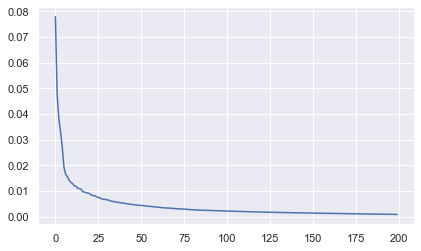

In [38]:
pca = ohe_pca[-1]
pca.singular_values_
plt.plot()
plt.plot(pca.explained_variance_ratio_)

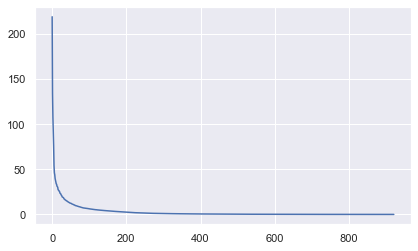

In [46]:
pca = ohe_kernel_pca[-1]
# pca.singular_values_
# plt.plot()
plt.plot(pca.eigenvalues_)